In [1]:
#Dependencies and Setup
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json

file_to_load = "NPD_Data_2018_2019_V3.csv"

purchase_data = pd.read_csv(file_to_load)
purchase_data_df = pd.DataFrame(purchase_data)
purchase_data_df.head()

,Year,Month,Retailer,StoreType,State,Region,Category,TY AUR,Units
0,2019,Feb,AAFES,B&M,AE,OTHER,JACKET/VEST,NaN,0
1,2019,Feb,AAFES,B&M,AE,OTHER,PANT/CAPRI,NaN,14
2,2019,Feb,AAFES,B&M,AK,NORTHWEST,JACKET/VEST,NaN,0
3,2019,Feb,AAFES,B&M,AK,NORTHWEST,PANT/CAPRI,NaN,28
4,2019,Feb,AAFES,B&M,AL,SOUTHEAST,JACKET/VEST,NaN,2


In [2]:
#Remove commas from the numbers
purchase_data['Units'] = purchase_data['Units'].replace(',','', regex=True)

#Convert the Units column as int
purchase_data['Units'] = purchase_data['Units'].astype(float)

In [3]:
purchase_data_df.describe()

,Year,Units
count,43656.000000,43656.000000
mean,2019.496701,97.326507
std,0.499995,666.411671
min,2019.000000,-72.000000
25%,2019.000000,0.000000
50%,2019.000000,6.000000
75%,2020.000000,40.000000
max,2020.000000,59480.000000


In [4]:
camping_gear = purchase_data_df[['Month','Category','Units']]
camping_gear.head()

,Month,Category,Units
0,Feb,JACKET/VEST,0.0
1,Feb,PANT/CAPRI,14.0
2,Feb,JACKET/VEST,0.0
3,Feb,PANT/CAPRI,28.0
4,Feb,JACKET/VEST,2.0


In [5]:
months = purchase_data_df.groupby('Month')
months.size()

Month
Apr    3571
Aug    3580
Dec    3845
Feb    3402
Jan    3793
Jul    3596
Jun    3660
Mar    3367
May    3585
Nov    3832
Oct    3831
Sep    3594
dtype: int64

In [6]:
retail = months.sum()

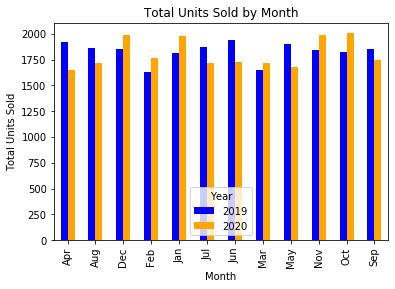

<Figure size 432x288 with 0 Axes>

In [9]:
data_points = purchase_data_df.groupby(["Year","Month"]).count()["Category"]

data_points.unstack(0).plot(kind="bar", color=['blue','orange'])
plt.title("Total Units Sold by Month")
plt.ylabel("Total Units Sold")
pd.set_option('mode.chained_assignment', None)
plt.show()


# Save the plotted figure as .pngs
plt.savefig('Units.png')

In [10]:
clean_data = purchase_data.dropna()

In [11]:
nineteen = clean_data[clean_data["Year"]==2019]
twenty = clean_data[clean_data["Year"]==2020]

nineteen_clothes = nineteen[(nineteen['Category'] == 'TENT') | (nineteen['Category'] == 'TENT')]
twenty_clothes = twenty[(twenty['Category'] == 'SLEEPING BAG') | (twenty['Category'] == 'SLEEPING BAG')]

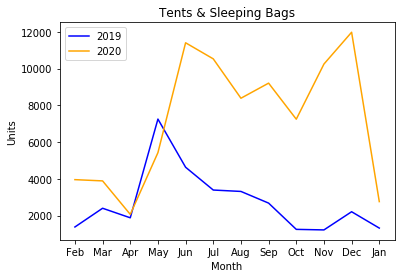

<Figure size 432x288 with 0 Axes>

In [12]:
nineteen_clothes['Units'] = nineteen_clothes['Units'].astype(float)
twenty_clothes['Units'] = twenty_clothes['Units'].astype(float)

a = nineteen_clothes.groupby(['Month'],sort = False).sum()
b = twenty_clothes.groupby(['Month'], sort = False).sum()

plt.plot(a["Units"],color="blue")
plt.plot(b["Units"],color="orange")
plt.legend(["2019","2020"])
plt.title("Tents & Sleeping Bags")
plt.xlabel("Month")
plt.ylabel("Units")
pd.set_option('mode.chained_assignment', None)
plt.show()

# Save the plotted figure as .pngs
plt.savefig('Tents_sleeping.png')